## 참고문헌
https://machinelearningmastery.com/calculate-feature-importance-with-python/

## 남은 것
 - train test split 수치 변경
 - test set performance

# 1. 데이터 import

In [1]:
import numpy as np
import pandas as pd

import sklearn
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import *
# from lightgbm import LGBMClasiifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier 


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.399844          
3          1                                           0.465022          
4          1                                           0.388680          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.451265   
3                                 0.538432   
4                                 0.415177   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.457733    
3                                           0.522298    
4                                           0.419134    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.583541                      0.583541   
3                 0.598783                      0.598783   
4                 0.590171                      0.590251   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998700                    0.796967   
3                0.998973                    0.797366   
4                0.998758                    0.796903   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808966                                      0.303350   
3                      0.809304                                      0.303475   
4                      0.808771                                      0.303116   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.739555                    0.003252   
3  ...                     0.795016                    0.003878   
4  ...                     0.710420                    0.005278   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.622929                0.583538   
3             0.623521                0.598782   
4             0.622605                0.590172   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.834697              0.281721   
3                             0.839973              0.278514   
4                             0.829939              0.285087   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026697   
3                             0.024752   
4                             0.026675   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.564663                   1   
3                                           0.575617                   1   
4                        

In [1]:
import pandas as pd
df = pd.read_csv('./train.csv')
df.head(3)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_23662/1251865915.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv')


ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   

                 Payment_Behaviour     Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663         Good  
1   Low_spent_Large_value_payments  284.62916249607184         Good  
2  Low_spent_Medium_value_payments   331.2098628537912         Good  

[3 rows x 28 columns]

# 2. 전처리

## X,y 초기화: 스케일링, 원핫엔코딩 이미 되어있음

 - 정규화
 - discretization -> one hot encoding

In [5]:
# df.columns
target= 'Delay_from_due_date'
y = df[target] # 종속변인 추출
X = df.drop([target, "Customer_ID", "Name", "SSN"], axis=1) # 종속변인+중복컬럼 제외

# X = StandardScaler().fit_transform(X) <- 정규화는 나중에! 중요도평가할 때 음수값 있으면 안됌

## 결측치 확인 및 imputation

In [7]:
X.head(2)


ID     Month Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0  0x1602   January  23  Scientist      19114.12            1824.843333   
1  0x1603  February  23  Scientist      19114.12                    NaN   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   

  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0          _           809.98                 26.82262  22 Years and 1 Months   
1       Good           809.98                 31.94496                    NaN   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    No           49.574949        80.41529543900253   
1                    No           49.574949       118.28022162236736   

                 Payment_Behaviour     Monthly_Balance  Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663          Good  
1   Low_spent_Large_value_payments  284.62916249607184          Good  

[2 rows x 24 columns]

In [ ]:
dummies = pd.get_dummies(df["Car Model"])
dummies
merged = pd.concat([df,dummies], axis='columns')
merged

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [4]:
pd.DataFrame(X.isnull().sum()).value_counts()

0    86
dtype: int64

## correlation matrix

In [5]:
import seaborn as sns
cor_matrix = df.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [6]:
pd.concat([X,y], axis=1)

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.399844          
3                                              0.465022          
4                                              0.388680          
...                                                 ...          
6487                                           0.477600          
6488                                           0.493687          
6489                                           0.475162          
6490                                           0.472725          
6491                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.451265   
3                                    0.538432   
4                                    0.415177   
...                                       ...   
6487                                 0.531127   
6488                                 0.539468   
6489                                 0.538269   
6490                                 0.533744   
6491                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.457733    
3                                              0.522298    
4                                              0.419134    
...                                                 ...    
6487                                           0.526099    
6488                                           0.543230    
6489                                           0.524172    
6490                                           0.520638    
6491                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.583541                      0.583541   
3                    0.598783                      0.598783   
4                    0.590171                      0.590251   
...                       ...                           ...   
6487                 0.595829                      0.595858   
6488                 0.604455                      0.604462   
6489                 0.598308                      0.598308   
6490                 0.610444                      0.610213   
6491                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998700                    0.796967   
3                   0.998973                    0.797366   
4                   0.998758                    0.796903   
...                      ...                         ...   
6487                0.998905                    0.797375   
6488                0.998992                    0.797409   
6489                0.998992                    0.797414   
6490                0.998984                    0.797401   
6491                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808966   
3                         0.809304   
4                         0.808771   
...                            ...   
6487                      0.809294   
6488                      0.809331   
6489                      0.809327   
6490                      0.809317   
6491    

## 중요도 평가, Variable Selection(이거 또는 아래의 PCA 중 하나 골라 사용)
 - 현재 : univariate
 - pca 빼기 : 변수별 중요도를 알고 싶은거니까
 - 함수 내장 importance, gini importance, permutation importance, correlation 추가해볼 것

### univariate

In [7]:
"""변수 중요도"""

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=47)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                                                Specs       Score
75                              Liability-Assets Flag  163.186528
31                         Total debt/Total net worth   16.870133
11                                       Tax rate (A)   11.426886
32                                       Debt ratio %    9.487650
50                                  Cash/Total Assets    8.108852
53                        Current Liability to Assets    6.496921
74                Current Liability to Current Assets    4.775838
1              ROA(A) before interest and % after tax    3.592829
66                             Fixed Assets to Assets    3.448255
48                          Quick Assets/Total Assets    3.339215
63                               Total expense/Assets    3.282158
2    ROA(B) before interest and depreciation after...    3.018252
0    ROA(C) before interest and depreciation befor...    2.980666
85                                Equity to Liability    2.648677
40        

In [8]:
a = featureScores.nlargest(30,'Score')
features = list(a.loc[:,'Specs'])

In [9]:
#X,y
X = df.loc[:,features]
X = StandardScaler().fit_transform(X)

In [10]:
import seaborn as sns
cor_matrix = X.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [11]:
features

[' Liability-Assets Flag',
 ' Total debt/Total net worth',
 ' Tax rate (A)',
 ' Debt ratio %',
 ' Cash/Total Assets',
 ' Current Liability to Assets',
 ' Current Liability to Current Assets',
 ' ROA(A) before interest and % after tax',
 ' Fixed Assets to Assets',
 ' Quick Assets/Total Assets',
 ' Total expense/Assets',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Equity to Liability',
 ' Total Asset Turnover',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Cash/Current Liability',
 ' Persistent EPS in the Last Four Seasons',
 ' Long-term Liability to Current Assets',
 ' Allocation rate per person',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Net Income to Total Assets',
 ' Contingent liabilities/Net worth',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Working Capital to Total Assets',
 ' Current Assets/Total Assets',
 ' Operating Profit Per Sh

### PCA - 안 하기로 함, code in without_discretization file

## 필요 변수 discretization
 - discretization 안 한 것이 더 좋게 나옴 - discretization code in 임규희_ver2

## Encoding - only in discretization

## Normalization

## Data Split: Train, Test, Val data

In [12]:
#Train(85*85%) / Test(15%) / Val(85*15%) Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15) #Test set:15%
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.15) #Validation set:15%(Train set에서 split)

In [13]:
# """정규화하면 인덱스 리셋안됨"""
# #행index 초기화(0부터 ~)
# X_train, y_train = X_train.reset_index(drop=True), y_train.reset_index(drop=True)
# X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)
# X_val, y_val = X_val.reset_index(drop=True), y_val.reset_index(drop=True)

## Oversampling(smote)

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE
print("Before OverSampling counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling counts of label '0': {}".format(sum(y_train==0)))

# sm = SMOTE(random_state = 42, sampling_strategy=0.5) #0.5비율 만큼 오버샘플링
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print("Before OverSampling counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling counts of label '1': 140
Before OverSampling counts of label '0': 4550
Before OverSampling counts of label '1': 4550
Before OverSampling counts of label '0': 4550


## Modeling

In [15]:
#10개의 모델
models = [
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
    ]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_val)
    results = (round(accuracy_score(y_val,y_hat),2),
                      round(precision_score(y_val,y_hat),2),
                      round(recall_score(y_val,y_hat),2),
                      round(f1_score(y_val,y_hat),2),
                       round(roc_auc_score(y_val,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf 

(1.0, 1.0) (0.94, 0.27, 0.43, 0.33, 0.69)


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(1.0, 1.0) (0.95, 0.25, 0.29, 0.27, 0.63)
(0.94, 0.94) (0.9, 0.2, 0.68, 0.31, 0.79)
(0.92, 0.92) (0.88, 0.2, 0.86, 0.33, 0.87)


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.93, 0.93) (0.88, 0.2, 0.82, 0.32, 0.85)
[02:17:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(1.0, 1.0) (0.95, 0.37, 0.5, 0.42, 0.74)
(0.92, 0.92) (0.88, 0.21, 0.86, 0.33, 0.87)
(0.97, 0.97) (0.92, 0.22, 0.61, 0.33, 0.77)
(1.0, 1.0) (0.94, 0.2, 0.29, 0.23, 0.62)
(0.97, 0.97) (0.92, 0.27, 0.75, 0.4, 0.84)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='auto', r...       1.00       1.00   
1                                    MLPClassifier()       1.00       1.00   
2  (DecisionTreeClassifier(max_depth=1, random_st...       0.94       0.94   
3                               LogisticRegression()       0.92       0.92   
4                                              SVC()       0.93       0.93   
5  XGBClassifier(base_score=0.5, booster='gbtree'...       1.00       1.00   
6                                    SGDClassifier()       0.92       0.92   
7  ([DecisionTreeRegressor(criterion='friedman_ms...       0.97       0.97   
8                           DecisionTreeClassifier()       1.00       1.00   
9                             KNeighborsClassifier()       0.97       0.97   

   acc_val  precision  recall  f1_score  auc_val  
0     0.94       0.27    0.43      0.33     0.69  
1     0.95       0.25    0.29      0.27     0.63  
2     0.90       0.20    0.68      0.31     0.79  
3     0.88       0.20    0.86      0.33     0.87  
4     0.88       0.20    0.82      0.32     0.85  
5     0.95       0.37    0.50      0.42     0.74  
6     0.88       0.21    0.86      0.33     0.87  
7     0.92       0.22    0.61      0.33     0.77  
8     0.94       0.20    0.29      0.23     0.62  
9     0.92       0.27    0.75      0.40     0.84

## Add parameters for the best model(RF)

In [65]:
rf = RandomForestClassifier()

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

tuned_parameters = {'n_estimators': [50,100,1000],
                   'max_depth' : ['None',10,50,100],
                    'max_features' : [5,10,30],
                   'min_samples_split' : [2,10,50]
                   }
grid_rf = GridSearchCV(rf, param_grid = tuned_parameters, cv = KFold(n_splits = 5), n_jobs = -1, verbose = 0)
grid_rf.fit(X_train, y_train)

print("train")
print('best parameters : ', grid_rf.best_params_)
print('best scores : %.3f\n' %grid_rf.best_score_)


rdict2={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

em = grid_rf.best_estimator_
pred = em.predict(X_val)

print("val")
print("acc(val): %.3f" %accuracy_score(y_val, pred))
print("precision(val): %.3f" %precision_score(y_val, pred))
print("recall(val): %.3f" %recall_score(y_val, pred))

y_hat = em.predict(X_val)
results = (round(accuracy_score(y_val,y_hat),2),
                round(precision_score(y_val,y_hat),2),
                round(recall_score(y_val,y_hat),2),
                round(f1_score(y_val,y_hat),2),
                round(roc_auc_score(y_val,y_hat),2))

rdict2['model'].append('Random Forest'); 
rdict2['acc_train'].append(results_train[0]); rdict2['auc_train'].append(results_train[1])
rdict2['acc_val'].append(results[0])
rdict2['precision'].append(results[1])
rdict2['recall'].append(results[2])
rdict2['f1_score'].append(results[3])
rdict2['auc_val'].append(results[4])   
print(results_train, results)

rdf2 = pd.DataFrame(data=rdict2)
rdf2 

/home/ai-healthcare/toolkit/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.95762898 0.9582876  0.95905598
 0.95499451 0.95521405 0.95708013 0.9417124  0.9413831  0.94237102
 0.95751921 0.96026345 0.95938529 0.95806806 0.95839737 0.95839737
 0.94248079 0.94401756 0.94467618 0.95587267 0.95631175 0.95631175
 0.9532382  0.95444566 0.95499451 0.94127333 0.94259056 0.94160263
 0.96992316 0.97167947 0.97200878 0.96937431 0.96794731 0.96948408
 0.94873765 0.95049396 0.94994512 0.97244786 0.97387486 0.97343578
 0.9701427  0.97036224 0.97025247 0.95279912 0.95115258 0.95301866
 0.96937431 0.97036224 0.97135

train
best parameters :  {'max_depth': 50, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 100}
best scores : 0.974

val
acc(val): 0.957
precision(val): 0.364
recall(val): 0.444
(0.97, 0.97) (0.96, 0.36, 0.44, 0.4, 0.71)


model  acc_train  auc_train  acc_val  precision  recall  f1_score  \
0  Random Forest       0.97       0.97     0.96       0.36    0.44       0.4   

   auc_val  
0     0.71

## 분석 

### 그래프

#### Precision Recall Graph

Random Forest: f1=0.353 auc=0.466


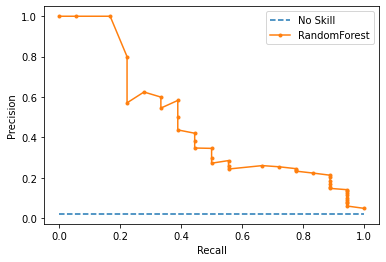

In [17]:
# precision, recall, thresholds = precision_recall_curve(testy, probs)
# f1 = f1_score(testy, yhat)
# auc = auc(recall, precision)
from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#trainX_train, testX_val, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
em.fit(X_train, y_train)
# predict probabilities
lr_probs = em.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
y_hat = em.predict(X_val)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, y_hat), auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### ROC_AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.951


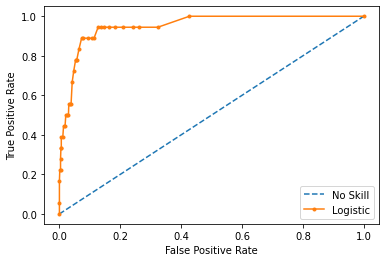

In [18]:
# In[38]:
# probs = rf.predict_proba(X_val)
# fpr, tpr, thresholds = roc_curve(y, probs)
# auc = roc_auc_score(y, probs)
# print('AUC: %.3f' % auc)


#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
#mode.fit(trainX, trainy)
# predict probabilities
lr_probs = em.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_val))]
# rf_probs = rf.predict_proba(X_val)
# rf_probs_경기 = rf_probs[1][:,0]
# ns_auc = roc_auc_score(y_val.iloc[:,0], ns_probs)
# rf_auc = roc_auc_score(y_val.iloc[:,0],rf_probs_경기)

# ns_fpr, ns_tpr, _ = roc_curve(y_val.iloc[:,0], ns_probs)
# rf_fpr, rf_tpr, _ = roc_curve(y_val.iloc[:,0], rf_probs_경기)

# plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
# plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest')

# plt.legend()
# plt.show()

#### tree graph

In [23]:
X_val = pd.DataFrame(X_val)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

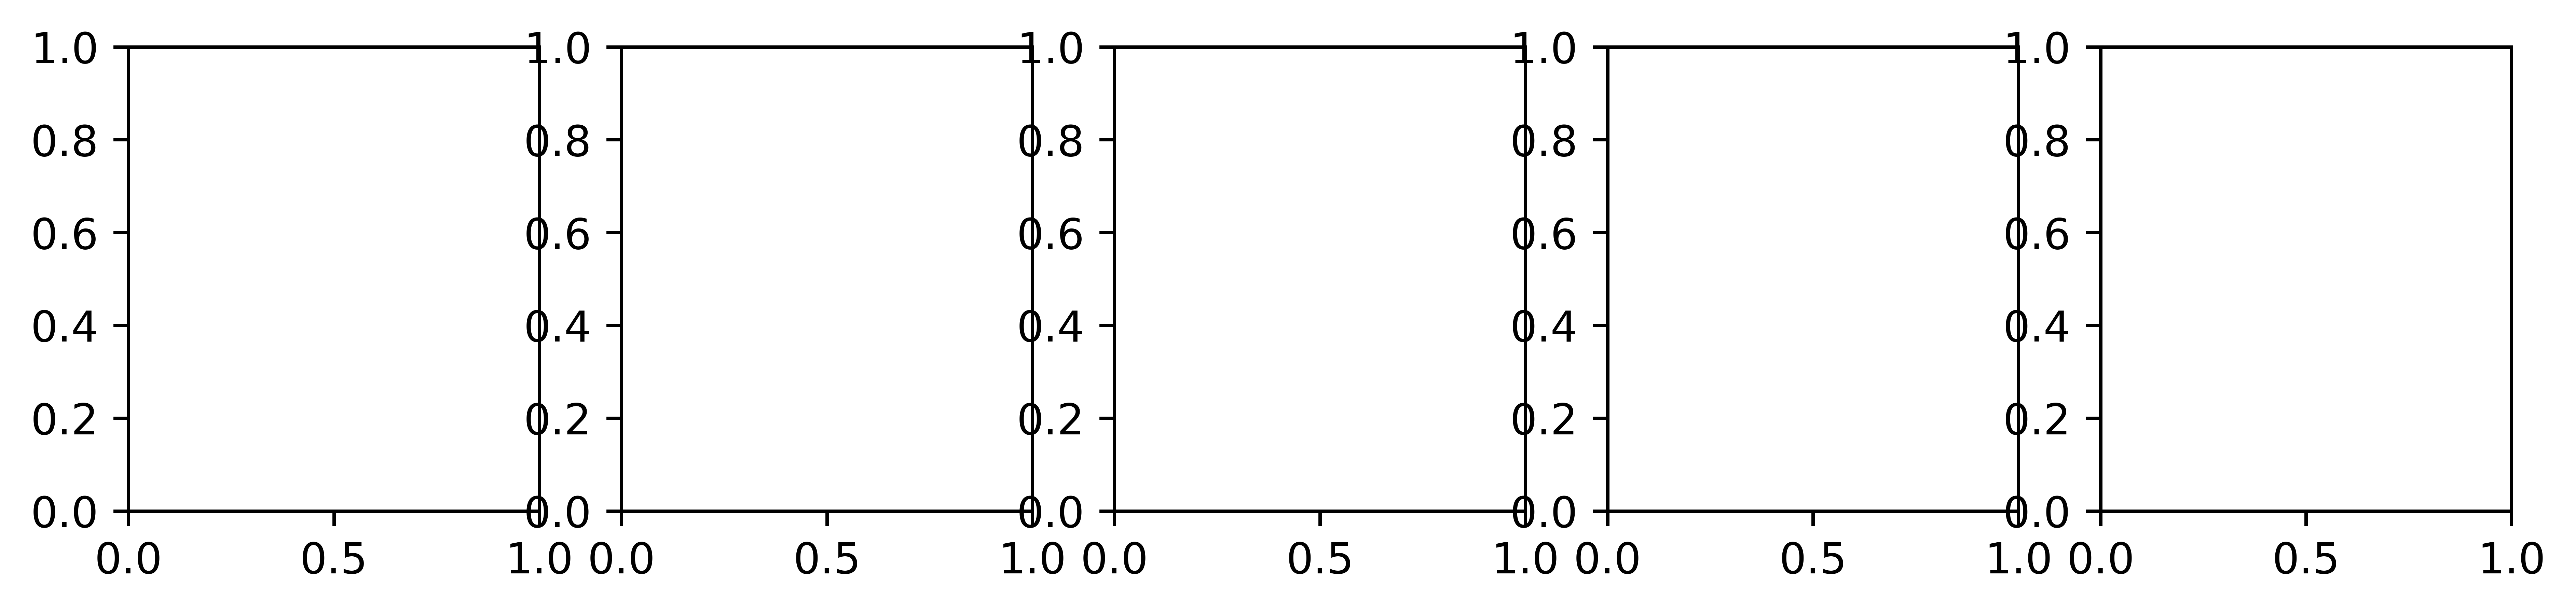

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
# ### tree graph

# In[49]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi = 900)
for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                  feature_names = X_val.columns,
                  #class_names = y_val.columns,
                  filled = True,
                   ax = axes[index])
    axes[index].set_title('Estimator:'+str(index), fontsize=11)


# In[50]:

# clf = RandomForestClassifiers()
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[i], feature_names = X_val.columns, filled = True)


In [25]:
X_val = pd.DataFrame(X_val)
plt.figure(figsize=(12,12))
_ = tree.plot_tree(rf.estimators_[1], feature_names = X_val.columns, filled = True)
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 864x864 with 0 Axes>

#### Scalability graph

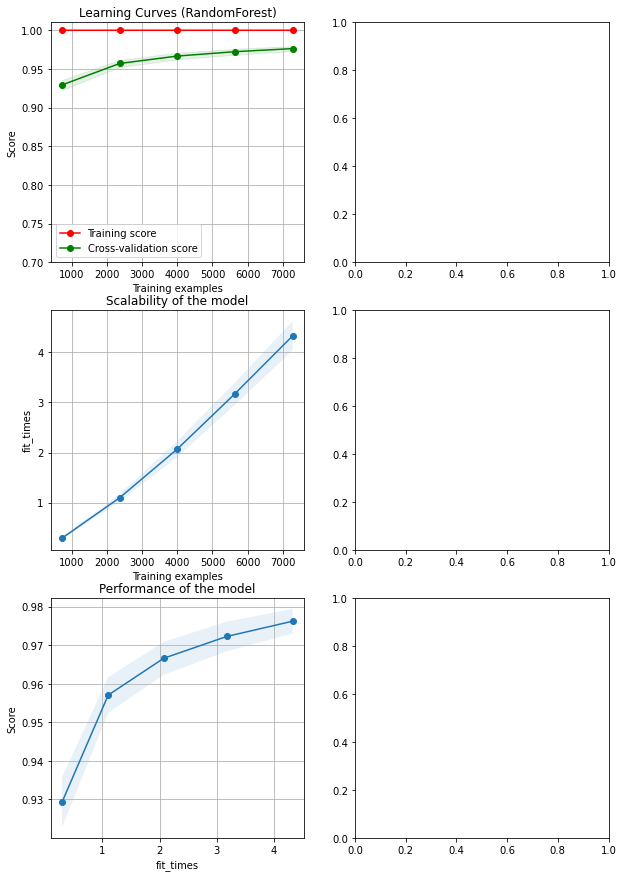

[02:48:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:48:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:48:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:48:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)
X = X_train
y = y_train

title = "Learning Curves (RandomForest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = GaussianNB()
estimator = RandomForestClassifier(max_depth=50, max_features=10, min_samples_split=2, n_estimators=100)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

# title = "Learning Curves (XGB)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# # estimator = SVC(gamma=0.001)
# estimator = XGBClassifier()
# plot_learning_curve(
#     estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )

plt.show()

### SHAP Value

In [23]:
import shap
import skimage
rf_model = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=10)
rf_model = rf_model.fit(X_train, y_train)
rf_model_predict = rf_model.predict(X_test)

#### 변수별 value증가에 따른 파산 확률 추이(+각 레코드별)

In [24]:
#각 변수 별로, 값이 증가함에 따라 파산의 확률변화를 볼 수 있다.
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap_values = np.array(shap_values)
X_test = pd.DataFrame(X_test)

shap.initjs() #자바 스크립트 초기화(그래프 초기화)
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test)

#### 하나의 행에 대해 어떤 변수가 많은 영향을 미쳤는지 확인

In [ ]:
#빨강색이 파산에 긍정적 영향, 파랑색이 파산에 부정적 영향!
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test.iloc[1]) # <- 1행에 대해서! 아래 shap_value(1)도 1행에 대해서!

shap_values = np.array(shap_values)
X_test = pd.DataFrame(X_test)

shap.initjs() #자바 스크립트 초기화(그래프 초기화)
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test.iloc[1])

#### 모든 변수 한 번에!

In [ ]:
#모든변수 한 번에!
shap.summary_plot(shap_values[1], X_test)

In [ ]:
# 모든변수 한 번에(bar로)
shap.summary_plot(shap_values[1], X_test, plot_type = "bar")

#### 한 변수가 어느 변수에 가장 높은 영향력을 미치는가

In [ ]:
# "지정변수"와 가장 관련이 큰 변수를 오른쪽에 보여줌
# EPS가 낮을 때 해당 변수에 높은 영향력을 보임
shap.dependence_plot(' Persistent EPS in the Last Four Seasons', shap_values[1], X_test)

#### Target = 1 and 0 비교 (summary or force plot!)

In [ ]:
testset = pd.concat([y_test, X_test], axis=1)
df_test0 = testset.loc[testset.loc[:,'Bankrupt?'] == 0]
df_test1 = testset.loc[testset.loc[:,'Bankrupt?'] == 1]

y_test0 = df_test0.loc[:,'Bankrupt?']
X_test0 = df_test0.drop(['Bankrupt?'], axis='columns')

y_test1 = df_test1.loc[:,'Bankrupt?']
X_test1 = df_test1.drop(['Bankrupt?'], axis='columns')

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [ ]:
#taget=0인 testset

import shap
import skimage
rf_model = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=10)
rf_model = rf_model.fit(X_train, y_train)
rf_model_predict = rf_model.predict(X_test)

explainer = shap.TreeExplainer(rf_model)
# shap_values1 = explainer.shap_values(X_test0) #아래 smmary_plot
shap_values1 = explainer.shap_values(X_test0.iloc[1]) #아래 force_plot
shap_values = np.array(shap_values1)

shap.initjs()
# shap.summary_plot(shap_values[1], X_test0, plot_type = "bar")
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test0.iloc[1])

In [ ]:
#taget=1인 testset

import shap
import skimage
rf_model = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=10)
rf_model = rf_model.fit(X_train, y_train)
rf_model_predict = rf_model.predict(X_test)

explainer = shap.TreeExplainer(rf_model)
# shap_values1 = explainer.shap_values(X_test1) #아래 smmary_plot
shap_values1 = explainer.shap_values(X_test1.iloc[1]) #아래 force_plot
shap_values = np.array(shap_values1)

# shap.summary_plot(shap_values[1], X_test1, plot_type = "bar")
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test1.iloc[1])